# Summary:
This is just a histogram of the previous old `dataArduino`'s sampling rate, as defined by the difference between MATLAB times between every two consecutive samples.

This `dataArduino` only adds samples in between running sections of the main MATLAB ToneDiscriminationV3_GF.m code throughout a single trial, leading to very uneven sampling, and it also sends several other bytes of irrelevant information each time (e.g. empty left and right lickspout detection data) which further slows it down.

### imports

In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import re
import glob

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html
import scipy.signal as signal

# interpolation because ARDUINO data is spaced unevenly
import scipy.interpolate as interpolate

# save data
import pickle

### set `folder_name`

In [8]:
# for all .mat files in this folder starting with "ToneDisc_ANChandler_p1_" in their name
folder_name = './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_'

### sort through relevant .mat files found in folder by day ("_d#")

In [10]:
unsorted_mat_files = glob.glob(folder_name+'*.mat')
sorted_mat_files = sorted(unsorted_mat_files, key=lambda x: int(re.search(r'\d+.mat$',x).group()[:-4]))
sorted_mat_files

['./Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d1.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d2.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d3.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d4.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d5.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d6.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d7.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d8.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d9.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d10.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d11.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d12.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d13.mat',
 './Data/Chandler/Phase1/ToneDisc_ANChandler_p1_d14.mat']

### load `data` from .mat file and split into `params` and `response`

In [15]:
mat_dict = io.loadmat(sorted_mat_files[0])

data = mat_dict['data'][0][0]
params = data[0][0][0]
response = data[1][0][0]

### get `dataArduino` (ARDUINO data)

In [16]:
dataArduino = response[0]
print("dataArduino shape: "+str(dataArduino.shape))

dataArduino shape: (229399, 7)


### Look at sampling rate and plot a histogram of the sampling rate across the entire `dataArduino`

In [17]:
dts = []
old_arduino_t = dataArduino[0, 0]
for arduino_t in dataArduino[1:, 0]:
    dts.append(arduino_t - old_arduino_t)
    old_arduino_t = arduino_t

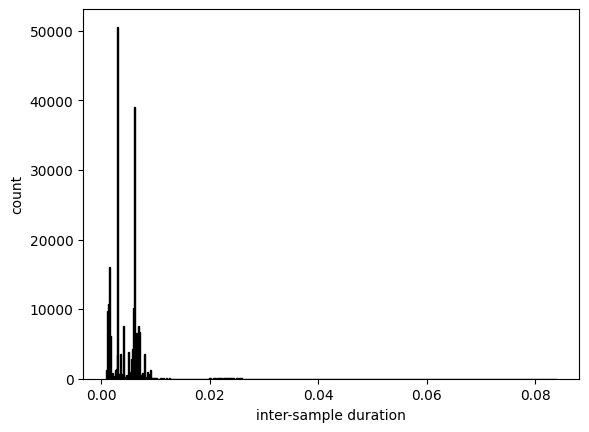

mean:  0.004398837462837514  s
std:  0.0031208585850821574  s
min:  0.0007755999999972119  s
max:  0.08397740000000198  s


In [28]:
# plotting histogram of dataArduino inter-sample durations
plt.hist(dts, bins=500, edgecolor='black')
plt.xlabel('inter-sample duration')
plt.ylabel('count')
plt.show()

# print out mean and std of sampling rate
print("mean: ", str(sum(dts) / len(dts)), " s")
print("std: ", str(statistics.stdev(dts)), " s")
print("min: ", str(min(dts)), " s")
print("max: ", str(max(dts)), " s")